In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'



The main aim of this notebook is to train Hybrid models for 250 dimension dataset. We use both CNN and RNN here.


In [2]:
musicFeatures = pd.read_pickle("./musicFeatures.pkl")  

In [3]:
musicFeatures.shape

(26900, 22)

In [4]:
musicFeatures.head(3)

,id,genre,mfccFeature_0,mfccFeature_1,mfccFeature_2,mfccFeature_3,mfccFeature_4,mfccFeature_5,mfccFeature_6,mfccFeature_7,...,mfccFeature_10,mfccFeature_11,mfccFeature_12,mfccFeature_13,mfccFeature_14,themeFeature_0,themeFeature_1,themeFeature_2,themeFeature_3,themeFeature_4
0,124425_0,Folk,"[-367.4169, -240.58614, -193.78488, -180.29262...","[163.79123, 170.1294, 171.51189, 161.30435, 14...","[6.0959854, -5.9718704, -3.6486344, -1.2554941...","[53.194122, 63.06723, 60.13885, 54.763412, 52....","[16.68528, 19.538809, 19.626118, 18.60508, 23....","[-23.51472, -19.84507, -16.962742, -13.548637,...","[6.3363132, -1.276854, -5.610017, -4.050003, -...","[-20.14743, -24.12778, -16.919537, -7.6289234,...",...,"[3.951639, -4.166794, -8.241913, -9.794014, -1...","[5.920375, 9.249519, 8.353765, 11.909894, 14.4...","[-12.381685, -16.062777, -16.373697, -15.77498...","[-3.8526406, -3.5650363, -4.6753526, -5.407305...","[-4.4005404, -11.534243, -12.7789135, -14.0914...","[-2.81877732, 0.0170741491, -2.23746324, -1.79...","[-0.648167074, -0.260594785, -1.02404821, 2.81...","[-0.6686466, 2.7766242, -1.6993774, -3.4631765...","[-0.7302982, 1.5127099, 1.2979797, 0.65926456,...","[-2.26469612, 3.18752861, -1.83492291, 1.09744..."
1,124425_1,Folk,"[-176.67264, -169.07156, -142.83098, -116.0994...","[125.95861, 142.0693, 138.62712, 128.68915, 12...","[-42.819057, -54.282654, -64.97652, -73.68849,...","[68.79902, 82.17572, 71.34984, 73.27362, 84.63...","[15.051884, 15.13154, 15.273981, 14.384039, 15...","[-5.963161, -10.348415, -12.421081, -9.166971,...","[18.740742, 19.350863, 8.707056, 3.6187146, 1....","[-11.269847, -7.254199, 1.2921772, -1.4600475,...",...,"[-5.3846745, -10.779312, -19.985872, -18.81395...","[12.694374, 11.362453, 8.072839, 4.8536325, -0...","[3.3793998, -0.6741159, -0.14108896, -5.083455...","[-19.578459, -20.371014, -11.236882, -7.421087...","[-8.606797, -10.857103, -13.955954, -13.888264...","[-2.81877732, 0.0170741491, -2.23746324, -1.79...","[-0.648167074, -0.260594785, -1.02404821, 2.81...","[-0.6686466, 2.7766242, -1.6993774, -3.4631765...","[-0.7302982, 1.5127099, 1.2979797, 0.65926456,...","[-2.26469612, 3.18752861, -1.83492291, 1.09744..."
2,124425_2,Folk,"[-112.90256, -84.587326, -92.53052, -99.84867,...","[118.598724, 102.67175, 82.80994, 73.35031, 71...","[-33.237568, -38.343197, -34.45424, -24.077305...","[50.234768, 52.99376, 56.314552, 51.52988, 53....","[18.136402, 22.863585, 18.818027, 11.438265, 8...","[-23.589928, -19.38637, -15.253525, -5.8537474...","[11.365215, 6.558339, -1.7250502, -4.8964157, ...","[-8.613762, -10.419959, -4.151663, -1.5471857,...",...,"[-19.939487, -16.535833, -21.92295, -25.605438...","[12.999569, 8.9071, 3.3847241, 5.747637, 2.470...","[-5.4092526, -7.6361217, -13.698164, -13.45112...","[-0.42731082, -2.8598223, -1.4495995, 1.697975...","[-14.1753845, -20.045826, -20.387835, -21.9254...","[-2.81877732, 0.0170741491, -2.23746324, -1.79...","[-0.648167074, -0.260594785, -1.02404821, 2.81...","[-0.6686466, 2.7766242, -1.6993774, -3.4631765...","[-0.7302982, 1.5127099, 1.2979797, 0.65926456,...","[-2.26469612, 3.18752861, -1.83492291, 1.09744..."


In [5]:
"""
Verifying all shapres and types of data
"""
print(musicFeatures.shape)
print('MFCC Features \n')
print(type(musicFeatures['mfccFeature_0'].iloc[0]))
print(len(musicFeatures['mfccFeature_0'].iloc[0]))
print(type(musicFeatures['mfccFeature_0'].iloc[0][0]))

print('Theme Features \n')
print(type(musicFeatures['themeFeature_0'].iloc[0]))
print(musicFeatures['themeFeature_0'].iloc[0].size)
print(type(musicFeatures['themeFeature_0'].iloc[0][0]))



(26900, 22)
MFCC Features 

<class 'numpy.ndarray'>
250
<class 'numpy.float64'>
Theme Features 

<class 'numpy.ndarray'>
250
<class 'numpy.float64'>


We split the dataset into x and y, y having the predicting columns

In [6]:
#Spliting x and y

y = musicFeatures['genre']
x = musicFeatures.loc[:, musicFeatures.columns != 'genre']
x = x.drop(['id'],axis =1)

print(x.shape)
print(y.shape)

(26900, 20)
(26900,)


Since we have an np array as in each cell, we need to reshape the data into a 3rd array for the network, we use the following function for the same.

In [7]:
def convertTo3DnpArray(df):
    new = []

    for index, row in df.iterrows():
        temp = []
        for i in row:
            temp.append(i)
        temp = np.stack(temp, axis=1)
        new.append(temp)
    new = np.stack(new, axis=0)
    
    return new

We split the dataset into train,test and valid which is of the ratio 80:10:10. Each model is trained on train and tested on test, once the best model is identified, we do a final validation on valid dataset.

In [8]:
#Train test valid split

x_train_temp, x_valid, y_train_temp, y_valid = train_test_split(x,y,test_size=0.1,random_state=12,stratify=y)
x_train, x_test, y_train, y_test = train_test_split(x_train_temp,y_train_temp,test_size=0.1/0.9,random_state=12,stratify=y_train_temp)

print('Final Sizes of all datasets')
print('x_train :',x_train.shape)
print('x_test :',x_test.shape)
print('x_valid :',x_valid.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)
print('y_valid :',y_valid.shape)
print(' \n')

print('Value counts ')
print('y_train :')
print(y_train.value_counts())
print('y_test :')
print(y_test.value_counts())
print('y_valid :')
print(y_valid.value_counts())



Final Sizes of all datasets
x_train : (21520, 20)
x_test : (2690, 20)
x_valid : (2690, 20)
y_train : (21520,)
y_test : (2690,)
y_valid : (2690,)
 

Value counts 
y_train :
Rock            3820
Hip-Hop         3304
Experimental    3228
Folk            3224
Electronic      3192
Pop             2428
Instrumental    2324
Name: genre, dtype: int64
y_test :
Rock            477
Hip-Hop         413
Experimental    404
Folk            403
Electronic      399
Pop             303
Instrumental    291
Name: genre, dtype: int64
y_valid :
Rock            478
Hip-Hop         413
Folk            403
Experimental    403
Electronic      399
Pop             304
Instrumental    290
Name: genre, dtype: int64


In [9]:
#splitting dataset into two parts

x_train_audio = convertTo3DnpArray(x_train.iloc[:,0:15])
x_test_audio = convertTo3DnpArray(x_test.iloc[:,0:15])
x_valid_audio = convertTo3DnpArray(x_valid.iloc[:,0:15])

x_train_theme = convertTo3DnpArray(x_train.iloc[:,15:])
x_test_theme = convertTo3DnpArray(x_test.iloc[:,15:])
x_valid_theme = convertTo3DnpArray(x_valid.iloc[:,15:])

print(x_train_audio.shape,x_train_theme.shape)

(21520, 250, 15) (21520, 250, 5)


In [10]:
x_train.iloc[:,0:15]

,mfccFeature_0,mfccFeature_1,mfccFeature_2,mfccFeature_3,mfccFeature_4,mfccFeature_5,mfccFeature_6,mfccFeature_7,mfccFeature_8,mfccFeature_9,mfccFeature_10,mfccFeature_11,mfccFeature_12,mfccFeature_13,mfccFeature_14
35394,"[-259.05927, -239.89516, -210.36134, -191.0854...","[95.85247, 89.139465, 100.31354, 114.44683, 12...","[-37.76436, -62.810684, -82.836006, -89.18021,...","[35.43055, 31.09402, 16.134083, 23.663452, 24....","[-3.8478534, -3.804813, -18.247433, -21.18354,...","[-5.8638554, -8.563865, -5.0026045, -3.563768,...","[-29.522072, -30.139166, -25.777792, -18.43643...","[-15.362446, -16.980038, -18.577564, -19.80409...","[-17.15803, -18.717222, -12.115081, -13.080694...","[4.9135947, 0.48395002, -2.3608677, -8.914128,...","[-6.845843, -8.657402, -8.819773, -13.005529, ...","[-7.297282, -4.4590926, -4.291797, -10.961505,...","[-8.618434, -8.838449, -20.322239, -25.85178, ...","[8.280407, 6.65845, -3.0541248, -7.157876, -7....","[8.006058, 4.326626, -4.908849, -5.9096045, -3..."
34049,"[-188.014, -206.20021, -225.0521, -220.18987, ...","[128.69154, 141.3887, 154.6398, 159.06891, 149...","[-13.482424, -30.97063, -57.24858, -63.42682, ...","[23.985256, 33.63526, 42.476974, 35.33845, 25....","[14.964792, 19.501078, 24.636375, 23.640629, 1...","[-17.882114, -18.361004, -14.050748, -11.75215...","[-20.248413, -13.562236, -8.63477, -8.473328, ...","[-14.179203, -10.178944, -10.123768, -12.31093...","[-5.8441324, -6.1650333, -3.1949024, -2.722711...","[10.911045, 8.321631, 6.160431, 0.95847726, 6....","[7.8805685, 4.39023, 5.0924635, -2.262684, -5....","[-2.038714, 0.29762447, 0.21831286, -1.5235238...","[-6.681349, -7.536511, -8.555668, -5.4461303, ...","[-9.045403, -11.071377, -10.651661, -8.457749,...","[-3.9182348, -0.5984701, -4.849672, -3.298818,..."
34247,"[-82.13368, -56.982624, -58.14949, -60.955105,...","[74.79721, 72.48038, 69.69021, 71.89056, 76.14...","[-9.761583, -8.974573, -13.565889, -18.574867,...","[44.51985, 46.574883, 50.270557, 49.844574, 45...","[-1.7989714, -5.9998593, -8.879391, -7.259489,...","[23.213932, 23.701248, 27.05341, 30.459, 28.99...","[8.85959, 6.395796, 3.8830438, 4.5139427, 5.85...","[10.348799, 16.238556, 20.261578, 19.654716, 2...","[13.655914, 8.072505, -0.37761527, 0.3474199, ...","[16.148502, 13.345703, 6.496121, 6.0975375, 11...","[-3.413521, -0.6451754, -8.567261, -14.476906,...","[-2.6246097, -2.939661, -0.95807236, -2.185254...","[-7.3780622, -13.883275, -14.423538, -12.80759...","[3.8376787, 6.9531918, 11.388884, 15.410437, 1...","[-2.1842833, -4.0735054, -3.4050357, -2.386907..."
35132,"[-74.62353, -47.188427, -43.740658, -31.355085...","[110.29732, 108.80856, 104.4259, 102.99172, 10...","[19.360918, 18.530136, 10.443481, -7.501622, -...","[32.394424, 31.694412, 30.137642, 27.804893, 2...","[-8.631376, -3.527607, 3.8489022, 4.4208837, -...","[5.9561634, 13.809061, 19.815063, 12.495829, 6...","[-8.04807, -11.654659, -10.895243, -18.075535,...","[9.950865, 10.536844, 17.713945, 17.78846, 17....","[9.039571, 1.4659774, -7.285754, -0.81587684, ...","[8.814006, 9.20682, 5.9413443, 8.706055, 9.271...","[-11.550571, -8.380802, -5.6130843, -1.6310983...","[4.697386, 7.635721, 12.914742, 15.211265, 10....","[-11.157985, -15.638721, -8.871193, -7.4123173...","[2.4558992, 2.0242095, 7.875683, 6.6735973, 0....","[-5.083339, -7.525996, -2.9894814, -2.4445453,..."
22687,"[-10.387641, -2.7015615, -25.830664, -42.18832...","[105.466125, 105.41113, 110.17697, 114.190765,...","[4.6587563, 3.691368, 2.1789696, 3.4156444, 2....","[23.292372, 30.258991, 41.930916, 45.1681, 44....","[3.5131118, 4.38157, 6.6126113, 12.240705, 11....","[6.5239367, 8.461456, 10.868671, 12.047181, 6....","[-17.583548, -17.156866, -19.27493, -18.639069...","[-1.9000115, 4.3362274, 5.219447, 5.1462927, 7...","[-8.118086, -10.51737, -15.752861, -18.01086, ...","[2.6302576, 0.49581635, 0.15905619, -1.2537093...","[-0.6385004, -1.2256694, -3.262991, -3.5495977...","[-3.275594, 3.6539168, 9.7260685, 10.16334, 11...","[-10.0126

We convert the y values into one hot encoded values.

In [11]:
ohe = OneHotEncoder()

y_valid = ohe.fit_transform(y_valid.values.reshape(-1, 1)).toarray()
y_train = ohe.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_test  = ohe.fit_transform(y_test .values.reshape(-1, 1)).toarray()

print('Verifying size')
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)
print('y_valid :',y_valid.shape)


Verifying size
y_train : (21520, 7)
y_test : (2690, 7)
y_valid : (2690, 7)


In [12]:
from keras.models import Sequential,load_model
from keras.layers import Dense,GRU,Flatten,concatenate,Dropout,LSTM,Conv2D,MaxPooling2D,BatchNormalization,Dropout,Flatten
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Bidirectional
import matplotlib.pyplot as plt
plt.style.use('ggplot')

The following function is used to plot the graphs for train and loss accuracy.

In [13]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Test acc')
    plt.title('Training and test accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Test loss')
    plt.title('Training and test loss')
    plt.legend()

The first model has LSTM for audio and convolution for theme

In [14]:
#Input layers
audio_in = Input(shape=(x_train_audio.shape[1], x_train_audio.shape[2]), name='audio_in')
theme_in = Input(shape=(x_train_theme.shape[1], x_train_theme.shape[2], 1), name='theme_in')



#Audio layer
audio_LSTM1 = LSTM(64,return_sequences=True)(audio_in)
audio_LSTM2 = LSTM(64)(audio_LSTM1)
audio_dense = Dense(64, activation='relu')(audio_LSTM2)


#Theme layer

theme_Conv1 = Conv2D(32, (3,3), activation='relu')(theme_in)
theme_Pool1 = MaxPooling2D((3,3), strides=(2,2), padding='same')(theme_Conv1)
theme_drop1 = Dropout(0.1)(theme_Pool1)

theme_flatten1 = Flatten()(theme_drop1)
theme_dense = Dense(64, activation='relu')(theme_flatten1)

#Concatenation 
concat = concatenate([audio_dense, theme_dense])
dense1 = Dense(64, activation='relu')(concat)
dense2 = Dense(32, activation='relu')(dense1)
dense3 = Dense(16, activation='relu')(dense2)
op = Dense(7, activation='softmax',name='op')(dense3)


model = Model(inputs=[audio_in,theme_in], outputs=[op])

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 theme_in (InputLayer)          [(None, 250, 5, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 248, 3, 32)   320         ['theme_in[0][0]']               
                                                                                                  
 audio_in (InputLayer)          [(None, 250, 15)]    0           []                               
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 124, 2, 32)   0           ['conv2d[0][0]']                 
                                                                                              

Epoch 1/50
673/673 [==============================] - 67s 97ms/step - loss: 1.6296 - accuracy: 0.3816 - val_loss: 1.4580 - val_accuracy: 0.4770
Epoch 2/50
673/673 [==============================] - 66s 98ms/step - loss: 1.3781 - accuracy: 0.4960 - val_loss: 1.3292 - val_accuracy: 0.5283
Epoch 3/50
673/673 [==============================] - 65s 97ms/step - loss: 1.2024 - accuracy: 0.5733 - val_loss: 1.1021 - val_accuracy: 0.6197
Epoch 4/50
673/673 [==============================] - 65s 97ms/step - loss: 1.0255 - accuracy: 0.6389 - val_loss: 0.9992 - val_accuracy: 0.6483
Epoch 5/50
673/673 [==============================] - 66s 99ms/step - loss: 0.8769 - accuracy: 0.6918 - val_loss: 0.8567 - val_accuracy: 0.7052
Epoch 6/50
673/673 [==============================] - 66s 98ms/step - loss: 0.7818 - accuracy: 0.7270 - val_loss: 0.7781 - val_accuracy: 0.7234
Epoch 7/50
673/673 [==============================] - 66s 99ms/step - loss: 0.7037 - accuracy: 0.7532 - val_loss: 0.8182 - val_accuracy:

INFO:tensorflow:Assets written to: simple_rnn+cnn_model\assets


INFO:tensorflow:Assets written to: simple_rnn+cnn_model\assets


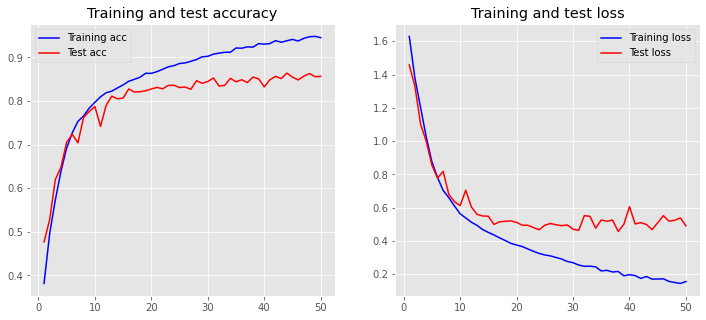

In [15]:

model.compile(optimizer = 'adam',
                     loss='categorical_crossentropy',
                     metrics = ['accuracy']
                     )


h=model.fit({'audio_in': x_train_audio, 'theme_in': x_train_theme},{'op': y_train},
              epochs=50, batch_size=32,
            validation_data=({'audio_in': x_test_audio, 'theme_in': x_test_theme},{'op': y_test}))


model.save('simple_rnn+cnn_model')


plot_history(h)

We also try CNN for audio and RNN for theme

In [20]:
#Input layers
audio_in = Input(shape=(x_train_audio.shape[1], x_train_audio.shape[2], 1), name='audio_in')
theme_in = Input(shape=(x_train_theme.shape[1], x_train_theme.shape[2]), name='theme_in')



#Audio layer
audio_Conv1 = Conv2D(32, (3,3), activation='relu')(audio_in)
audio_Pool1 = MaxPooling2D((3,3), strides=(2,2), padding='same')(audio_Conv1)
audio_batch1 = BatchNormalization()(audio_Pool1)

audio_Conv2 = Conv2D(32, (3,3), activation='relu')(audio_batch1)
audio_Pool2 = MaxPooling2D((3,3), strides=(2,2), padding='same')(audio_Conv2)
audio_batch2 = BatchNormalization()(audio_Pool2)

audio_Conv3 = Conv2D(32, (2,2), activation='relu')(audio_batch2)
audio_Pool3 = MaxPooling2D((3,3), strides=(2,2), padding='same')(audio_Conv3)
audio_batch3 = BatchNormalization()(audio_Pool3)
audio_drop1 = Dropout(0.3)(audio_batch3)

audio_flatten1 = Flatten()(audio_drop1)
audio_dense = Dense(64, activation='relu')(audio_flatten1)


#Theme layer

theme_GRU1 = GRU(64,return_sequences=True)(theme_in)
theme_GRU2 = GRU(64)(theme_GRU1)
theme_dense = Dense(64, activation='relu')(theme_GRU2)

#Concatenation 
concat = concatenate([audio_dense, theme_dense])
dense1 = Dense(64, activation='relu')(concat)
dense2 = Dense(32, activation='relu')(dense1)
dense3 = Dense(16, activation='relu')(dense2)
op = Dense(7, activation='softmax',name='op')(dense3)


model2 = Model(inputs=[audio_in,theme_in], outputs=[op])

model2.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 audio_in (InputLayer)          [(None, 250, 15, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_7 (Conv2D)              (None, 248, 13, 32)  320         ['audio_in[0][0]']               
                                                                                                  
 max_pooling2d_7 (MaxPooling2D)  (None, 124, 7, 32)  0           ['conv2d_7[0][0]']               
                                                                                                  
 batch_normalization_6 (BatchNo  (None, 124, 7, 32)  128         ['max_pooling2d_7[0][0]']  

Epoch 1/50
673/673 [==============================] - 83s 120ms/step - loss: 1.5238 - accuracy: 0.4347 - val_loss: 1.4092 - val_accuracy: 0.4717
Epoch 2/50
673/673 [==============================] - 82s 122ms/step - loss: 1.3360 - accuracy: 0.5137 - val_loss: 1.3412 - val_accuracy: 0.5268
Epoch 3/50
673/673 [==============================] - 77s 114ms/step - loss: 1.2185 - accuracy: 0.5646 - val_loss: 1.1595 - val_accuracy: 0.5825
Epoch 4/50
673/673 [==============================] - 77s 115ms/step - loss: 1.1143 - accuracy: 0.6040 - val_loss: 1.0764 - val_accuracy: 0.6216
Epoch 5/50
673/673 [==============================] - 76s 114ms/step - loss: 0.9994 - accuracy: 0.6475 - val_loss: 1.0221 - val_accuracy: 0.6383
Epoch 6/50
673/673 [==============================] - 77s 115ms/step - loss: 0.8808 - accuracy: 0.6925 - val_loss: 0.9527 - val_accuracy: 0.6706
Epoch 7/50
673/673 [==============================] - 78s 116ms/step - loss: 0.7852 - accuracy: 0.7294 - val_loss: 0.8496 - val_ac

INFO:tensorflow:Assets written to: simple_rnn+cnn_inverse4_model\assets


INFO:tensorflow:Assets written to: simple_rnn+cnn_inverse4_model\assets


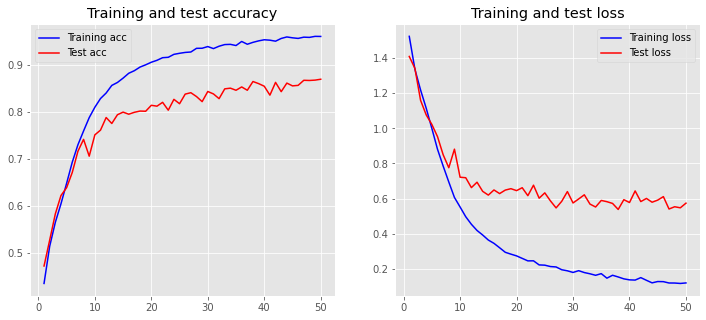

In [21]:
#Simple mix model with GRu for theme ,seems better


model2.compile(optimizer = 'adam',
                     loss='categorical_crossentropy',
                     metrics = ['accuracy']
                     )


h2=model2.fit({'audio_in': x_train_audio, 'theme_in': x_train_theme},{'op': y_train},
              epochs=50, batch_size=32,
            validation_data=({'audio_in': x_test_audio, 'theme_in': x_test_theme},{'op': y_test}))


model2.save('simple_rnn+cnn_inverse4_model')


plot_history(h2)

Final Evaluation - Model2 is best.

In [23]:
model2.evaluate({'audio_in': x_valid_audio, 'theme_in': x_valid_theme},{'op': y_valid})

85/85 [==============================] - 2s 27ms/step - loss: 0.6794 - accuracy: 0.8320


[0.6793630123138428, 0.8319702744483948]